In [1]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
# ouverture des différents datasets

#dataset1
os.chdir("C:/Users/antho/Projet_NBA/Dataset1_Tirs de NBA entre 1997 et 2019")
df1 = pd.read_csv('NBA Shot Locations 1997 - 2020.csv')

#dataset2
os.chdir("C:/Users/antho/Projet_NBA/Dataset2_Actions de chaque match entre 2000 et 2020")

# ouverture des 19 fichiers, un par saison, un fichier 2015-16 comporte 5 lignes à problèmes que j'ai supprimé
df00_01 = pd.read_csv('2000-01_pbp.csv')
df01_02 = pd.read_csv('2001-02_pbp.csv')
df02_03 = pd.read_csv('2002-03_pbp.csv')
df03_04 = pd.read_csv('2003-04_pbp.csv')
df04_05 = pd.read_csv('2004-05_pbp.csv')
df05_06 = pd.read_csv('2005-06_pbp.csv')
df06_07 = pd.read_csv('2006-07_pbp.csv')
df07_08 = pd.read_csv('2007-08_pbp.csv')
df08_09 = pd.read_csv('2008-09_pbp.csv')
df09_10 = pd.read_csv('2009-10_pbp.csv')
df10_11 = pd.read_csv('2010-11_pbp.csv')
df11_12 = pd.read_csv('2011-12_pbp.csv')
df12_13 = pd.read_csv('2012-13_pbp.csv')
df13_14 = pd.read_csv('2013-14_pbp.csv')
df14_15 = pd.read_csv('2014-15_pbp.csv')
df15_16 = pd.read_csv('2015-16_pbp.csv', on_bad_lines='warn')
df16_17 = pd.read_csv('2016-17_pbp.csv')
df17_18 = pd.read_csv('2017-18_pbp.csv')
df18_19 = pd.read_csv('2018-19_pbp.csv')
# le fichier df19_20 est inexploitable car structure différente


#dataset3
os.chdir("C:/Users/antho/Projet_NBA/Dataset3_Bilans d'équipe entre 2014 et 2018")
df4 = pd.read_csv('games.csv')
df5 = pd.read_csv('games_details.csv')
df6 = pd.read_csv('teams.csv')
df7 = pd.read_csv('players.csv')
df8 = pd.read_csv('ranking.csv')

#dataset4
os.chdir("C:/Users/antho/Projet_NBA/Dataset4_Joueurs de NBA depuis 1950")
df9 = pd.read_csv('player_data.xls')
df10 = pd.read_csv('Players.xls')
df11 = pd.read_csv('Seasons_Stats.csv')

b'Skipping line 100209: expected 34 fields, saw 57\n'
b'Skipping line 501558: expected 34 fields, saw 47\n'
b'Skipping line 601798: expected 34 fields, saw 35\n'
b'Skipping line 802080: expected 34 fields, saw 39\n'
b'Skipping line 1002194: expected 34 fields, saw 51\n'
C:\Users\antho\AppData\Local\Temp\ipykernel_11792\3939092654.py:26: DtypeWarning: Columns (3,6,8,10,12,16,18,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df15_16 = pd.read_csv('2015-16_pbp.csv', on_bad_lines='warn')
C:\Users\antho\AppData\Local\Temp\ipykernel_11792\3939092654.py:36: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv('games_details.csv')


In [3]:
df1 = df1.loc[(df1['Player Name'] == 'Tim Duncan') | (df1['Player Name'] == 'Kobe Bryant') | (df1['Player Name'] == 'Allen Iverson')
              | (df1['Player Name'] == 'Steve Nash') | (df1['Player Name'] == 'Ray Allen') | (df1['Player Name'] == 'Paul Pierce')
              | (df1['Player Name'] == 'Pau Gasol') | (df1['Player Name'] == 'Tony Parker') | (df1['Player Name'] == 'Manu Ginobili')
              | (df1['Player Name'] == 'Dwyane Wade') | (df1['Player Name'] == 'LeBron James') | (df1['Player Name'] == 'Chris Paul')
              | (df1['Player Name'] == 'Kevin Durant') | (df1['Player Name'] == 'Russell Westbrook') | (df1['Player Name'] == 'Stephen Curry')
              | (df1['Player Name'] == 'James Harden') | (df1['Player Name'] == 'Kawhi Leonard') | (df1['Player Name'] == 'Damian Lillard')
              | (df1['Player Name'] == 'Anthony Davis') | (df1['Player Name'] == 'Giannis Antetokounmpo')]

In [4]:
# transformer la variable SEASON_ID entier en objet afin de pouvoir faire l'étape suivante
df8['SEASON_ID'] = df8['SEASON_ID'].apply(str)

# SEASON_ID : 12020 ou 22020, on enlève le premier élément de la chaine de caractère
df8['SEASON_ID'] = df8['SEASON_ID'].apply(lambda saison: saison[1:])

# je supprime les colonnes qui ne nous intéressent pas
df8 = df8.drop(['LEAGUE_ID','STANDINGSDATE','TEAM','HOME_RECORD','ROAD_RECORD','RETURNTOPLAY'],axis = 1)

# je supprime les doublons et ne garde que la première ligne
df8 = df8.drop_duplicates(keep = 'first')

# je regroupe le df8 par équipe et par saison et garde pour chaque équipe par saison la valeur max de G(Game), W(victoire) et 
# L (défaite), les 3 ensemble correspondent au dernière stat de la saison, au classement final (ce que l'on veut)
df20 = df8.groupby(['TEAM_ID','SEASON_ID'])['G','W','L'].max().reset_index()

# grâce aux 5 valeurs de df20, je viens rajouter la valeur 'W_PCT' correspondante
df20 = df20.merge(right = df8,on = ['SEASON_ID','TEAM_ID','G','W','L'], how = 'inner')

# je supprime les doublons si il y a
df20 = df20.drop_duplicates()

C:\Users\antho\AppData\Local\Temp\ipykernel_11792\2179496741.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df20 = df8.groupby(['TEAM_ID','SEASON_ID'])['G','W','L'].max().reset_index()


In [5]:
df20 = df20.drop([378,459,599])                                                                     

#df20 = df20.drop_duplicates() ne m'affichait aucun doublons alors qu'il y en avait, pas compris donc 
#je les ai enlevé manuellement

In [6]:
# classement des équipes par saison de 2002 à 2021 en fonction de la valeur de W_PCT

# trier en fonction de la saison et de la valeur de W_PCT
df20 = df20.sort_values(['SEASON_ID','W_PCT'])

# pour chaque saison, je crée un df trier par ordre croissant et je viens faire le classement en départageant deux valeurs
# par la méthode first (première valeur dans le tableau en premier

df2002 = df20[df20['SEASON_ID'] == '2002'].reset_index()
df2002['classement'] = df2002['W_PCT'].rank(method = 'min', ascending = False)

df2003 = df20[df20['SEASON_ID'] == '2003'].reset_index()
df2003['classement'] = df2003['W_PCT'].rank(method = 'min', ascending = False)

df2004 = df20[df20['SEASON_ID'] == '2004'].reset_index()
df2004['classement'] = df2004['W_PCT'].rank(method = 'min', ascending = False)

df2005 = df20[df20['SEASON_ID'] == '2005'].reset_index()
df2005['classement'] = df2005['W_PCT'].rank(method = 'min', ascending = False)

df2006 = df20[df20['SEASON_ID'] == '2006'].reset_index()
df2006['classement'] = df2006['W_PCT'].rank(method = 'min', ascending = False)

df2007 = df20[df20['SEASON_ID'] == '2007'].reset_index()
df2007['classement'] = df2007['W_PCT'].rank(method = 'min', ascending = False)

df2008 = df20[df20['SEASON_ID'] == '2008'].reset_index()
df2008['classement'] = df2008['W_PCT'].rank(method = 'min', ascending = False)

df2009 = df20[df20['SEASON_ID'] == '2009'].reset_index()
df2009['classement'] = df2009['W_PCT'].rank(method = 'min', ascending = False)

df2010 = df20[df20['SEASON_ID'] == '2010'].reset_index()
df2010['classement'] = df2010['W_PCT'].rank(method = 'min', ascending = False)

df2011 = df20[df20['SEASON_ID'] == '2011'].reset_index()
df2011['classement'] = df2011['W_PCT'].rank(method = 'min', ascending = False)

df2012 = df20[df20['SEASON_ID'] == '2012'].reset_index()
df2012['classement'] = df2012['W_PCT'].rank(method = 'min', ascending = False)

df2013 = df20[df20['SEASON_ID'] == '2013'].reset_index()
df2013['classement'] = df2013['W_PCT'].rank(method = 'min', ascending = False)

df2014 = df20[df20['SEASON_ID'] == '2014'].reset_index()
df2014['classement'] = df2014['W_PCT'].rank(method = 'min', ascending = False)

df2015 = df20[df20['SEASON_ID'] == '2015'].reset_index()
df2015['classement'] = df2015['W_PCT'].rank(method = 'min', ascending = False)

df2016 = df20[df20['SEASON_ID'] == '2016'].reset_index()
df2016['classement'] = df2016['W_PCT'].rank(method = 'min', ascending = False)

df2017 = df20[df20['SEASON_ID'] == '2017'].reset_index()
df2017['classement'] = df2017['W_PCT'].rank(method = 'min', ascending = False)

df2018 = df20[df20['SEASON_ID'] == '2018'].reset_index()
df2018['classement'] = df2018['W_PCT'].rank(method = 'min', ascending = False)

df2019 = df20[df20['SEASON_ID'] == '2019'].reset_index()
df2019['classement'] = df2019['W_PCT'].rank(method = 'min', ascending = False)

df2020 = df20[df20['SEASON_ID'] == '2020'].reset_index()
df2020['classement'] = df2020['W_PCT'].rank(method = 'min', ascending = False)

df2021 = df20[df20['SEASON_ID'] == '2021'].reset_index()
df2021['classement'] = df2021['W_PCT'].rank(method = 'min', ascending = False)

df20 = pd.concat([df2002,df2003,df2004,df2005,df2006,df2007,df2008,df2009,df2010,df2011,df2012,df2013,df2014,df2015,df2016,df2017,df2018,df2019,df2020,df2021])


In [7]:
#insérer une variable birth_date avec les dates de naissance de chacun des 20 joueurs

# renommer la variable afin que le merge puisse se faire
df9 = df9.rename({'name' : 'Player Name'}, axis = 1)

# on récupère les data de nos joueurs d'intérêts uniquement
birth_date = df9.loc[(df9['Player Name'] == 'Tim Duncan') | (df9['Player Name'] == 'Kobe Bryant') | (df9['Player Name'] == 'Allen Iverson')
              | (df9['Player Name'] == 'Steve Nash') | (df9['Player Name'] == 'Ray Allen') | (df9['Player Name'] == 'Paul Pierce')
              | (df9['Player Name'] == 'Pau Gasol') | (df9['Player Name'] == 'Tony Parker') | (df9['Player Name'] == 'Manu Ginobili')
              | (df9['Player Name'] == 'Dwyane Wade') | (df9['Player Name'] == 'LeBron James') | (df9['Player Name'] == 'Chris Paul')
              | (df9['Player Name'] == 'Kevin Durant') | (df9['Player Name'] == 'Russell Westbrook') | (df9['Player Name'] == 'Stephen Curry')
              | (df9['Player Name'] == 'James Harden') | (df9['Player Name'] == 'Kawhi Leonard') | (df9['Player Name'] == 'Damian Lillard')
              | (df9['Player Name'] == 'Anthony Davis') | (df9['Player Name'] == 'Giannis Antetokounmpo')]

# on supprime les colonnes qui ne nous intéressent pas (sauf birth_date et le poste)
birth_date = birth_date.drop(['year_start','year_end','height','weight','college'], axis = 1)

# on rajoute les colonnes birth_date et position dans le df1 en fonction de nos joueurs
df1 = df1.merge(right = birth_date,on = 'Player Name', how = 'inner')

In [8]:
# transformer le format birth_date pour qu'il soit exploitable pour calculer l'âge de chaque joueur en fonction du match

#créer une variable pour ne garder que l'année, le mois et le jour
df1['year_birth_date'] = df1['birth_date'].apply(lambda date: date.split(',')[1])
df1['month_birth_date'] = df1['birth_date'].apply(lambda date: date.split()[0])
df1['day_birth_date'] = df1['birth_date'].apply(lambda date: date.split(',')[0].split()[1])

#on transforme les mois : January en 01 et ainsi de suite
df1 = df1.replace({'January' : '01', 'February' : '02', 'March' : '03', 'April' : '04', 'May' : '05', 'June' : '06', 'July' : '07', 'August' : '08', 'September' : '09', 'October' : '10', 'November' : '11', 'December' : '12'})

# on concatène l'année, le mois et le jour
df1['date_birth_date'] = df1['year_birth_date'] + '-' + df1['month_birth_date'] + '-' + df1['day_birth_date']

# on convertit en format datetime
df1['date_birth_date'] = pd.to_datetime(df1['date_birth_date'])

In [9]:
# transformer le format Game Date pour qu'il soit exploitable pour calculer l'âge de chaque joueur en fonction du match

# on convertir Game Date en objet afin de pouvoir effectuer les prochaines étapes
df1['Game Date'] = df1['Game Date'].apply(str)

#créer une variable pour ne garder que l'année, le mois et le jour
df1['year_Game Date'] = df1['Game Date'].apply(lambda date: date[:4])
df1['month_Game Date'] = df1['Game Date'].apply(lambda date: date[4:6])
df1['day_Game Date'] = df1['Game Date'].apply(lambda date: date[6:])

# on concatène l'année, le mois et le jour
df1['date_Game Date'] = df1['year_Game Date'] + '-' + df1['month_Game Date'] + '-' + df1['day_Game Date']

# on convertit en format datetime
df1['date_Game Date'] = pd.to_datetime(df1['date_Game Date'])

In [10]:
# on calcule l'âge du joueur pour chaque match en arrondissant à l'année inférieure (logique)

df1['age'] = ((df1['date_Game Date'] - df1['date_birth_date']).dt.days / 365.2425) . apply(np.floor)

In [11]:
df1

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,Shot Type,Shot Zone Basic,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type,position,birth_date,year_birth_date,month_birth_date,day_birth_date,date_birth_date,year_Game Date,month_Game Date,day_Game Date,date_Game Date,age
0,29700010,31,1495,Tim Duncan,1610612759,San Antonio Spurs,1,8,47,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,16,154,53,0,19971031,DEN,SAS,Regular Season,F-C,"April 25, 1976",1976,04,25,1976-04-25,1997,10,31,1997-10-31,21.0
1,29700010,76,1495,Tim Duncan,1610612759,San Antonio Spurs,1,5,11,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,19971031,DEN,SAS,Regular Season,F-C,"April 25, 1976",1976,04,25,1976-04-25,1997,10,31,1997-10-31,21.0
2,29700010,87,1495,Tim Duncan,1610612759,San Antonio Spurs,1,4,4,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,19971031,DEN,SAS,Regular Season,F-C,"April 25, 1976",1976,04,25,1976-04-25,1997,10,31,1997-10-31,21.0
3,29700010,226,1495,Tim Duncan,1610612759,San Antonio Spurs,2,3,35,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,11,-115,16,1,19971031,DEN,SAS,Regular Season,F-C,"April 25, 1976",1976,04,25,1976-04-25,1997,10,31,1997-10-31,21.0
4,29700010,287,1495,Tim Duncan,1610612759,San Antonio Spurs,3,10,59,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,68,23,1,19971031,DEN,SAS,Regular Season,F-C,"April 25, 1976",1976,04,25,1976-04-25,1997,10,31,1997-10-31,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350862,41800306,520,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,4,10,10,Pullup Jump shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,14,-147,16,0,20190525,TOR,MIL,Playoffs,F-G,"December 6, 1994",1994,12,6,1994-12-06,2019,05,25,2019-05-25,24.0
350863,41800306,568,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,4,5,55,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,-38,5,0,20190525,TOR,MIL,Playoffs,F-G,"December 6, 1994",1994,12,6,1994-12-06,2019,05,25,2019-05-25,24.0
350864,41800306,577,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,4,5,19,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,-5,1,20190525,TOR,MIL,Playoffs,F-G,"December 6, 1994",1994,12,6,1994-12-06,2019,05,25,2019-05-25,24.0
350865,41800306,591,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,4,4,12,Driving Floating Bank Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,-3,67,0,20190525,TOR,MIL,Playoffs,F-G,"December 6, 1994",1994,12,6,1994-12-06,2019,05,25,2019-05-25,24.0


In [12]:
# pour avoir le classement de chaque équipe à la fin de chaque saison

# on renomme la variable GAME_ID pour pouvoir utiliser la fonction merge après
df4 = df4.rename({'GAME_ID' : 'Game ID'}, axis = 1)

# on choisit uniquement les variables qui nous intéressent : Game ID et SEASON
df4 = df4.iloc[:,[1,3,4,5]]

# on merge la saison
df1 = df1.merge(right = df4,on = 'Game ID', how = 'inner')
df1['adversaire_ID'] = np.where(df1['HOME_TEAM_ID'] == df1['Team ID'],df1['VISITOR_TEAM_ID'],df1['HOME_TEAM_ID'])

# puis on merge le W_PCT et le classement de l'équipe à la fin de la saison grâce à la variable SEASON
df20['SEASON_ID'] = df20['SEASON_ID'].apply(int)
df20 = df20.rename({'SEASON_ID' : 'SEASON', 'TEAM_ID' : 'adversaire_ID'}, axis = 1)
df20 = df20.iloc[:,[1,2,7,8]]

df1 = df1.merge(right = df20,on = ['SEASON','adversaire_ID'], how = 'inner')

In [13]:
# certaines équipes ont changé de noms donc on remplace les anciens par le plus récent
df1['Home Team'] = df1['Home Team'].replace({'VAN' : 'MEM', 'SEA' : 'OKC', 'NJN' : 'BKN', 'NOH' : 'NOP', 'NOK' : 'NOP', 'CHH' 
                                            : 'CHA'})
df1['Away Team'] = df1['Away Team'].replace({'VAN' : 'MEM', 'SEA' : 'OKC', 'NJN' : 'BKN', 'NOH' : 'NOP', 'NOK' : 'NOP', 'CHH' 
                                            : 'CHA'})

df5['TEAM_ABBREVIATION'] = df5['TEAM_ABBREVIATION'].replace({'VAN' : 'MEM', 'SEA' : 'OKC', 'NJN' : 'BKN', 'NOH' : 'NOP', 'NOK' 
                                                            : 'NOP', 'CHH' : 'CHA'})


In [14]:
# insérer la variable TEAM_ABBREVIATION du df5 dans df1
df5 = df5.iloc[:,[0,1,2]]
df8 = df8.iloc[:,[0,2]]

df21 = df8.groupby('TEAM_ID').max()
df21 = df21.merge(right = df5, on = 'TEAM_ID', how = 'inner')

df22 = df21.iloc[:,[0,3]]
df22 = df22.rename({'TEAM_ID' : 'Team ID'}, axis = 1)
df22 = df22.groupby('Team ID').max()
df1 = df1.merge(right = df22, on = 'Team ID', how = 'inner')

# joue à domicile (=1) ou à l'extérieur (=0)

df1['domicile'] = np.where(df1['Home Team'] == df1['TEAM_ABBREVIATION'],1,0)

# donner le nom de l'équipe adverse sous forme abbrégée
df1['adversaire'] = np.where(df1['domicile'] == 1,df1['Away Team'],df1['Home Team'])

# insérer la variable conférence_adversaire du df8 au df1
conf = df21.iloc[:,[1,3]]
conf = conf.rename({'TEAM_ABBREVIATION' : 'adversaire', 'CONFERENCE' : 'CONFERENCE_ADVERSAIRE'}, axis = 1)
conf = conf.groupby('adversaire').max().reset_index()
df1 = df1.merge(right = conf, on = 'adversaire', how = 'inner')

In [15]:
# angle du shoot 

#calcul de l'angle A : A = arctan(X/Y)

X_Y = df1['X Location'] / df1['Y Location']

# des NaN ont été créé (0/0 : le joueur se situait au niveau du panier : dunk donc on peut estimer qu'il n'y a pas de 
# contrainte d'angle, comme si l'angle était de 0 peu importe où le joueur dunkait), les remplacer par la valeur 0 
X_Y = X_Y.fillna(value = 0)

# calcul de l'angle avec np.arctan
df1['angle_tir'] = np.arctan(X_Y)

# convertir la mesure (radian) en degré
df1['angle_tir'] = ((df1['angle_tir'] * 180) / np.pi)

#prendre la valeur absolue de l'angle
df1['angle_tir'] = df1['angle_tir'].abs()

In [16]:
# concaténer les variables minutes et secondes restantes pour en faire qu'une seule

df1['Tps_restant'] = np.where(df1['Seconds Remaining'] < 10, df1['Minutes Remaining'].apply(str) + ':0' + df1['Seconds Remaining'].apply(str),
         df1['Minutes Remaining'].apply(str) + ':' + df1['Seconds Remaining'].apply(str))

In [17]:
# traitement du dataset 2 

In [18]:
# on garde uniquement les variables d'intérêts

df00_01 = df00_01.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]
df01_02 = df01_02.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]
df02_03 = df02_03.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]
df03_04 = df03_04.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]
df04_05 = df04_05.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]
df05_06 = df05_06.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]
df06_07 = df06_07.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]
df07_08 = df07_08.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]
df08_09 = df08_09.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]
df09_10 = df09_10.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]
df10_11 = df10_11.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]
df11_12 = df11_12.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]
df12_13 = df12_13.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]
df13_14 = df13_14.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]
df14_15 = df14_15.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]
df15_16 = df15_16.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]
df16_17 = df16_17.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]
df17_18 = df17_18.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]
df18_19 = df18_19.iloc[:,[2,3,4,5,7,8,12,13,14,16,19,25,30,31,32]]

In [19]:
# on concatène tous les fichiers de 2000 à 2019

df00_19 = pd.concat([df00_01,df01_02,df02_03,df03_04,df04_05,df05_06,df06_07,df07_08,df08_09,df09_10,df10_11,df11_12,df12_13,
                     df13_14,df14_15,df15_16,df16_17,df17_18,df18_19])

In [20]:
df00_19.drop(df00_19[df00_19['PCTIMESTRING'] == 'ATL'].index, inplace = True)
df00_19 = df00_19.dropna(subset = ['PCTIMESTRING'], how = 'any')

In [21]:
# on remplace les valeurs NaN par 0 - 0 (SCOREMARGIN) et par 0 (SCORE) lors du début d'un match

df00_19['SCOREMARGIN'] = np.where((df00_19['PCTIMESTRING'] == '12:00') & (df00_19['PERIOD'] == 1),0,df00_19['SCOREMARGIN'])
df00_19['SCORE'] = np.where((df00_19['PCTIMESTRING'] == '12:00') & (df00_19['PERIOD'] == 1),'0 - 0',df00_19['SCORE'])
df00_19['SCOREMARGIN'] = df00_19['SCOREMARGIN'].replace('TIE',0)

# on remplacer les autres NaN par la précédente valeur (méthode ffill)
df00_19['SCOREMARGIN'] = df00_19['SCOREMARGIN'].fillna(method = 'ffill')
df00_19['SCORE'] = df00_19['SCORE'].fillna(method = 'ffill')

In [22]:
df00_19 = df00_19.loc[(df00_19['PLAYER1_NAME'] == 'Tim Duncan') | (df00_19['PLAYER1_NAME'] == 'Kobe Bryant') 
                    | (df00_19['PLAYER1_NAME'] == 'Allen Iverson') | (df00_19['PLAYER1_NAME'] == 'Steve Nash') 
                    | (df00_19['PLAYER1_NAME'] == 'Ray Allen') | (df00_19['PLAYER1_NAME'] == 'Paul Pierce')
                    | (df00_19['PLAYER1_NAME'] == 'Pau Gasol') | (df00_19['PLAYER1_NAME'] == 'Tony Parker') 
                    | (df00_19['PLAYER1_NAME'] == 'Manu Ginobili') | (df00_19['PLAYER1_NAME'] == 'Dwyane Wade') 
                    | (df00_19['PLAYER1_NAME'] == 'LeBron James') | (df00_19['PLAYER1_NAME'] == 'Chris Paul')
                    | (df00_19['PLAYER1_NAME'] == 'Kevin Durant') | (df00_19['PLAYER1_NAME'] == 'Russell Westbrook') 
                    | (df00_19['PLAYER1_NAME'] == 'Stephen Curry') | (df00_19['PLAYER1_NAME'] == 'James Harden') 
                    | (df00_19['PLAYER1_NAME'] == 'Kawhi Leonard') | (df00_19['PLAYER1_NAME'] == 'Damian Lillard')
                    | (df00_19['PLAYER1_NAME'] == 'Anthony Davis') | (df00_19['PLAYER1_NAME'] == 'Giannis Antetokounmpo')]

In [23]:
#renommer les colonnes pour pouvoir fusionner avec le df1
df00_19 = df00_19.rename({'GAME_ID' : 'Game ID', 'PCTIMESTRING' : 'Tps_restant', 'PERIOD' : 'Period', 'EVENTNUM' : 'Game Event ID'}, axis = 1)

In [24]:
# remplacer les RAS de HOMEDESCRIPTION ET VISITDESCRIPTION par RAS

df00_19['HOMEDESCRIPTION'] = df00_19['HOMEDESCRIPTION'].fillna('RAS')
df00_19['VISITORDESCRIPTION'] = df00_19['VISITORDESCRIPTION'].fillna('RAS')

In [25]:
# fusionner le df1 avec le df00_19

df00_19['Game Event ID'] = df00_19['Game Event ID'].apply(int)
df00_19['Period'] = df00_19['Period'].apply(int)
df00_19['Game ID'] = df00_19['Game ID'].apply(int)
df00_19 = df00_19.drop_duplicates(subset = ['Game Event ID','Game ID','Tps_restant'],keep = 'last')

df = df1.merge(right = df00_19, on = ['Period','Game ID','Game Event ID','Tps_restant'], how = 'inner')

In [26]:
# création de la variable "mène" en fonction du score
# 1 : mène, 0 : égalité, -1 : mené

df['SCOREMARGIN'] = df['SCOREMARGIN'].apply(int)

df['mène'] = np.where((df['domicile'] == 1) & (df['SCOREMARGIN'] < 0),-1,
             np.where((df['domicile'] == 1) & (df['SCOREMARGIN'] > 0),1,
             np.where((df['domicile'] == 0) & (df['SCOREMARGIN'] > 0),-1,
             np.where((df['domicile'] == 0) & (df['SCOREMARGIN'] < 0),1,
            ''))))
                                                                                  
df['mène'] = np.where(df['SCOREMARGIN'] == 0,0,df['mène'])

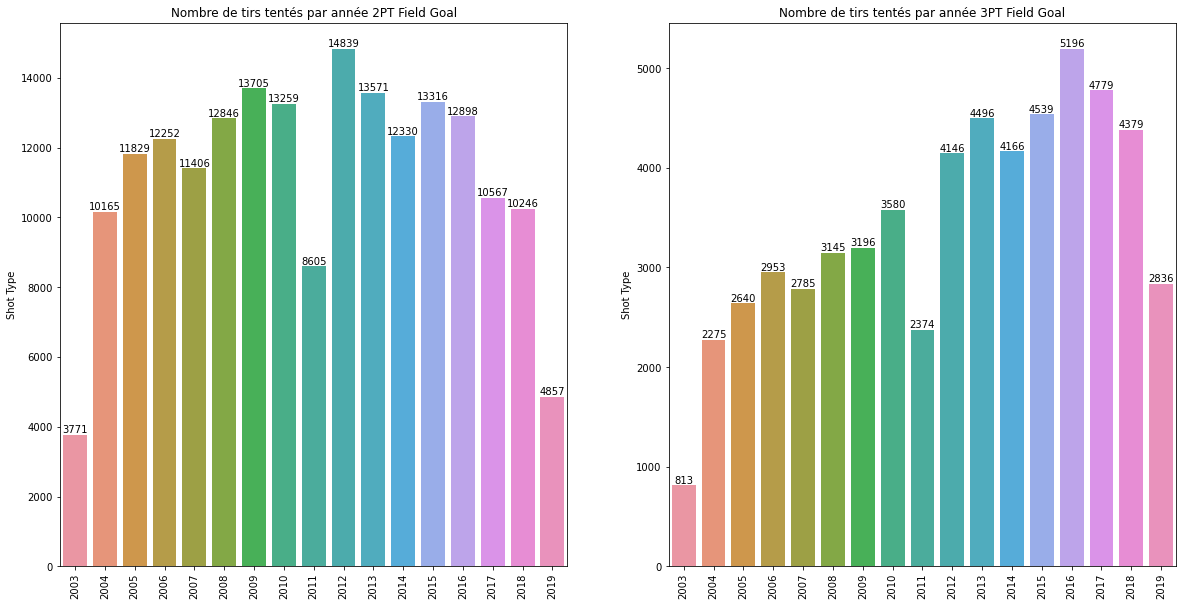

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,10))
for i in range(2):
    plt.subplot(1,2,i+1)
    graph = pd.DataFrame(df[df['Shot Type'] == df['Shot Type'].unique()[i]].groupby(by = 'year_Game Date')['Shot Type'].value_counts())
    p = sns.barplot(x = np.arange(2003,2020), y = 'Shot Type', data = graph)
    p.set_title(label = df['Shot Type'].unique()[i])
    plt.xticks(rotation = 90)
    p.set(xlabel = None);
    plt.bar_label(p.containers[0],fmt = '%.f',)
    plt.title('Nombre de tirs tentés par année {}'.format(df['Shot Type'].unique()[i]));


In [28]:
df00_19

,EVENTMSGTYPE,Game Event ID,Game ID,HOMEDESCRIPTION,Tps_restant,Period,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ABBREVIATION,PLAYER1_TEAM_ID,PLAYER2_NAME,PLAYER3_NAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION
2,1.0,2,20001116,RAS,11:45,1,947,Allen Iverson,PHI,1610612755.0,NaN,NaN,2 - 0,-2,Iverson 21' Jump Shot (2 PTS)
19,1.0,19,20001116,RAS,9:45,1,947,Allen Iverson,PHI,1610612755.0,NaN,NaN,6 - 2,-4,Iverson Driving Layup (4 PTS)
23,1.0,24,20001116,RAS,9:15,1,947,Allen Iverson,PHI,1610612755.0,Dikembe Mutombo,NaN,9 - 2,-7,Iverson 24' 3PT Jump Shot (7 PTS) (Mutombo 1 AST)
33,1.0,34,20001116,RAS,7:41,1,947,Allen Iverson,PHI,1610612755.0,NaN,NaN,11 - 4,-7,Iverson 20' Jump Shot (9 PTS)
35,6.0,36,20001116,RAS,7:07,1,947,Allen Iverson,PHI,1610612755.0,NaN,NaN,11 - 6,-5,Iverson OFF.Foul (P1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582017,3.0,600,21801018,RAS,0:08,4,201939,Stephen Curry,GSW,1610612744.0,NaN,NaN,105 - 103,-2,Curry Free Throw 1 of 2 (23 PTS)
582019,3.0,603,21801018,RAS,0:08,4,201939,Stephen Curry,GSW,1610612744.0,NaN,NaN,106 - 103,-3,Curry Free Throw 2 of 2 (24 PTS)
582022,8.0,606,21801018,RAS,0:08,4,201939,Stephen Curry,GSW,1610612744.0,Shaun Livingston,NaN,106 - 103,-3,SUB: Livingston FOR Curry
582025,3.0,612,21801018,Harden Free Throw 1 of 2 (29 PTS),0:06,4,201935,James Harden,HOU,1610612745.0,NaN,NaN,106 - 104,-2,RAS


In [29]:
# Affinage du dataset, certaines variables nécessaires à la dataviz sont conservées à ce stade
df = df.drop(["Game ID","Game Event ID","Player ID", "Team ID","Team Name", "Game Date","birth_date", "year_birth_date","month_birth_date",
              "day_birth_date", "date_birth_date", "month_Game Date","day_Game Date", "date_Game Date",
              "SEASON", "CONFERENCE_ADVERSAIRE",  "Home Team","Away Team",
              "Season Type","TEAM_ABBREVIATION","adversaire", "EVENTMSGTYPE",
              "HOMEDESCRIPTION", "PLAYER1_ID","PLAYER1_NAME","PLAYER1_TEAM_ABBREVIATION","PLAYER1_TEAM_ID",
              "PLAYER2_NAME", "PLAYER3_NAME","SCORE","VISITORDESCRIPTION","VISITOR_TEAM_ID","HOME_TEAM_ID","adversaire_ID"],axis = 1)

In [30]:
# Conversion de string à int pour 'position'
# Meneur de jeu (1)
df.loc[(df['Player Name'].str.contains("Parker")) | 
       (df['Player Name'].str.contains("Nash")) | 
       (df['Player Name'].str.contains("Paul")) | 
       (df['Player Name'].str.contains("Curry")) | 
       (df['Player Name'].str.contains("Lillard")) |
       (df['Player Name'].str.contains("Westbrook")) ,'position'] = 1 
# Arrière (2)
df.loc[(df['Player Name'].str.contains("Ginobili")) |
       (df['Player Name'].str.contains("Bryant")) |
       (df['Player Name'].str.contains("Wade")) |
       df['Player Name'].str.contains("Pierce") | df['Player Name'].str.contains("Allen") |
       df['Player Name'].str.contains("Harden"),'position'] = 2
# Ailier shooteur (3)
df.loc[(df['Player Name'].str.contains("Kawhi")) | 
       (df['Player Name'].str.contains("LeBron")) | 
       (df['Player Name'].str.contains("Durant")),'position'] = 3  
# Ailier fort (4)
df.loc[(df['Player Name'].str.contains("Duncan")) |
       (df['Player Name'].str.contains("Davis")) |
       (df['Player Name'].str.contains("Giannis")) ,'position'] = 4
# Pivot (5)
df.loc[df['Player Name'].str.contains("Gasol"),'position'] = 5

In [31]:
# CONVERSION DISTANCE DE FOOT A METRES
df['Shot Distance'] = df['Shot Distance']*0.3048

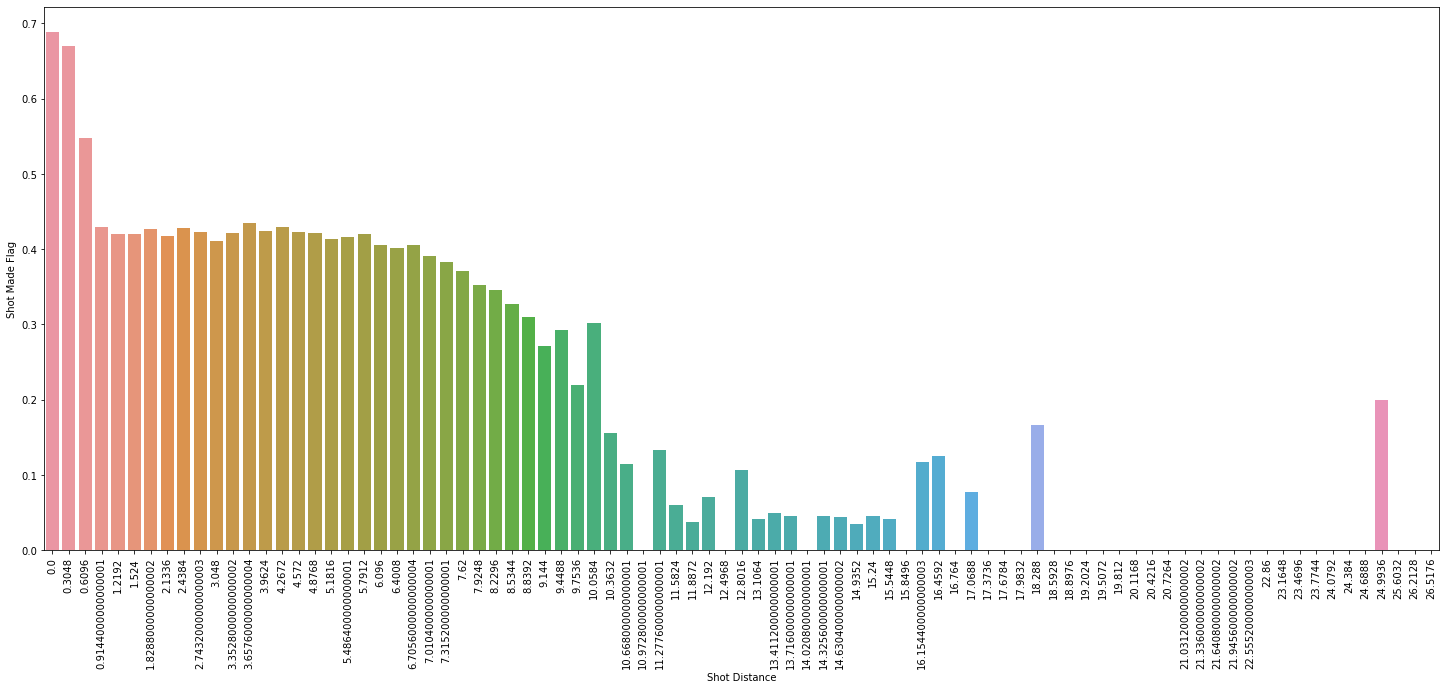

In [32]:
plt.figure(figsize = (25,10))
sns.barplot(data = pd.DataFrame(df.groupby(by = 'Shot Distance')['Shot Made Flag'].mean()).reset_index(), x = 'Shot Distance',y = 'Shot Made Flag')
plt.xticks(rotation = 90);

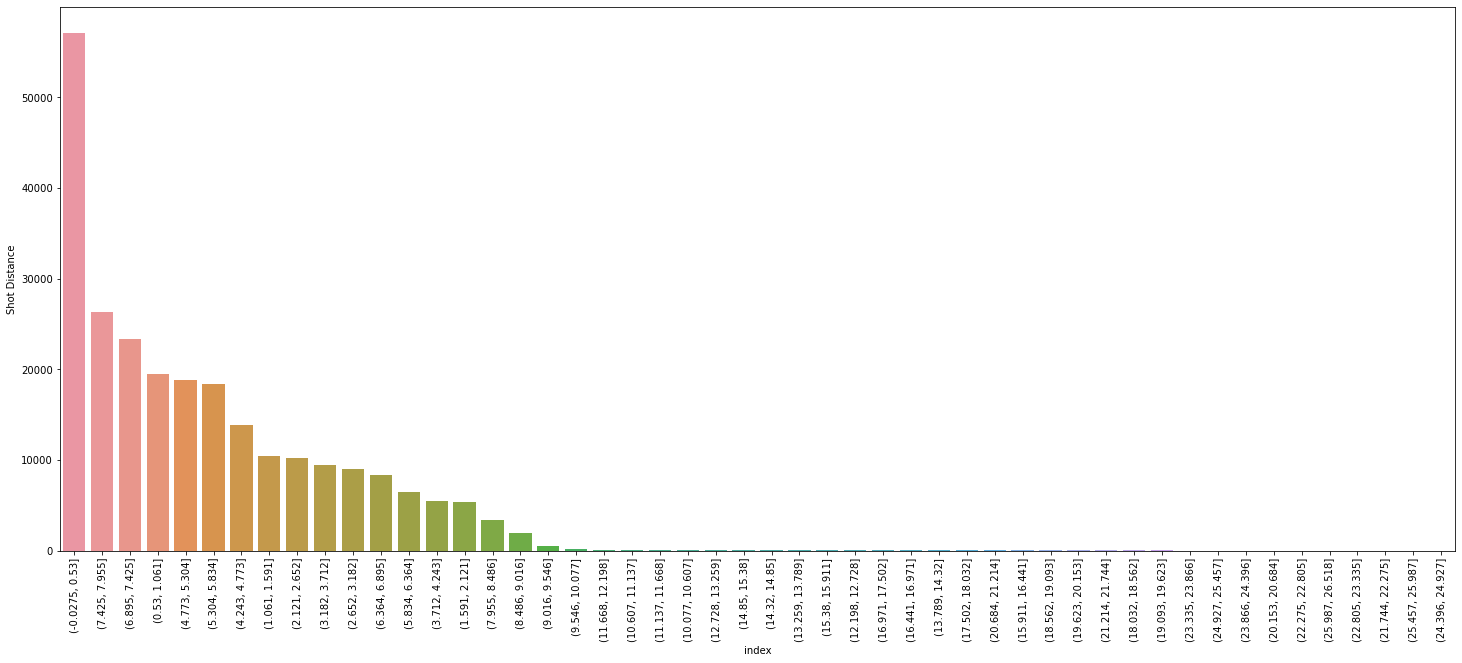

In [33]:
plt.figure(figsize = (25,10))
sns.barplot(data = pd.DataFrame(df['Shot Distance'].value_counts(bins = 50)).reset_index(), 
            x = 'index',y = 'Shot Distance')
plt.xticks(rotation = 90);

In [34]:
#Renommage des colonnes pour harmoniser
df.rename(columns={
"Period":  "period" ,
"Minutes Remaining": "minutes_remaining",
"Seconds Remaining": "seconds_remaining",
"Action Type":"action_type" , 
"Shot Type":"shot_type",
"Shot Distance": "shot_distance",
"Shot Made Flag": "shot_made_flag" ,
"W_PCT":"w_pct_adverse",
"classement" : "classement_adversaire",
"SCOREMARGIN":"score_margin",
"Shot Zone Basic": "shot_zone_basic",
"Shot Zone Area": "shot_zone_area",
"Shot Zone Range": "shot_zone_range",
"Tps_restant": "temps_restant",
"Player Name": "player_name",
"X Location": "x_location",
"Y Location": "y_location",
"year_Game Date": "year_game_date"
}, inplace=True)
df['year_game_date'] = df['year_game_date'].astype(int)
#20 variables, 40.8+ MB

In [35]:
# création d'une colonne unique en secondes pour le temps restant
df["temps_restant"] = (df["minutes_remaining"]*60) + (df["seconds_remaining"])
df = df.drop(["minutes_remaining","seconds_remaining"],axis = 1)
df['temps_restant'] = df['temps_restant'].astype('int32')

In [36]:
df['shot_type'] = df['shot_type'].replace(['2PT Field Goal', '3PT Field Goal'], [2, 3])

In [38]:
# Réduction de la mémoire qu'occupe le Dataset
df["period"] = df["period"].astype('int8')
df['action_type'] = df['action_type'].astype('category')
df['shot_distance'] = df['shot_distance'].astype('float32')
df['shot_made_flag'] = df['shot_made_flag'].astype('int8')
df['position'] = df['position'].astype('int8')
df['age'] = df['age'].astype('int8')
df['w_pct_adverse'] = df['w_pct_adverse'].astype('float32')
df['domicile'] = df['domicile'].astype('int8')
df['angle_tir'] = df['angle_tir'].astype('float32')
df['score_margin'] = df['score_margin'].astype('int8')
df['mène'] = df['mène'].astype('int8')

df.to_pickle('Nettoyage_données_NBA_DataViz.pkl')

In [39]:
df['shot_distance'] = np.round(df['shot_distance'],2)
df['angle_tir'] = np.round(df['angle_tir'],2)

In [40]:
df = df.drop(["shot_zone_basic","shot_zone_area", "shot_zone_range","player_name",
             "x_location", "y_location","year_game_date","classement_adversaire"],axis = 1)

In [41]:
df.to_pickle('Nettoyage_données_NBA.pkl')